In [112]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


### 1. How are Coefficients affected?

In [113]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [114]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['TARGET'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [115]:
df.shape

(442, 11)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=2)

In [117]:
coefs = []
r2_scores = []

for i in [0, 0.1, 1, 10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


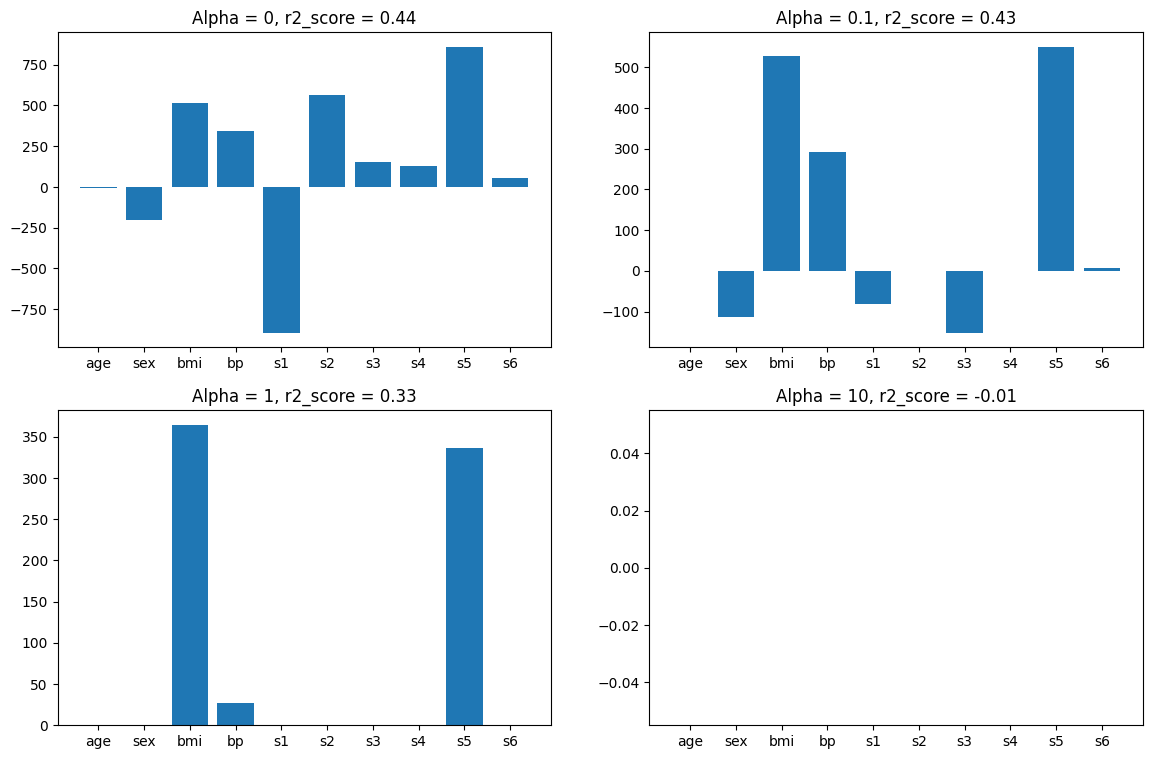

In [118]:
plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('Alpha = 0, r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title('Alpha = 0.1, r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('Alpha = 1, r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title('Alpha = 10, r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

### 2. Higher Coefficients are Affected More

In [119]:
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 100, 1000, 10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())

input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
10000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [120]:
alphas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.1, 0.5, 1, 5, 10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())

input_array = np.array(coefs).T

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


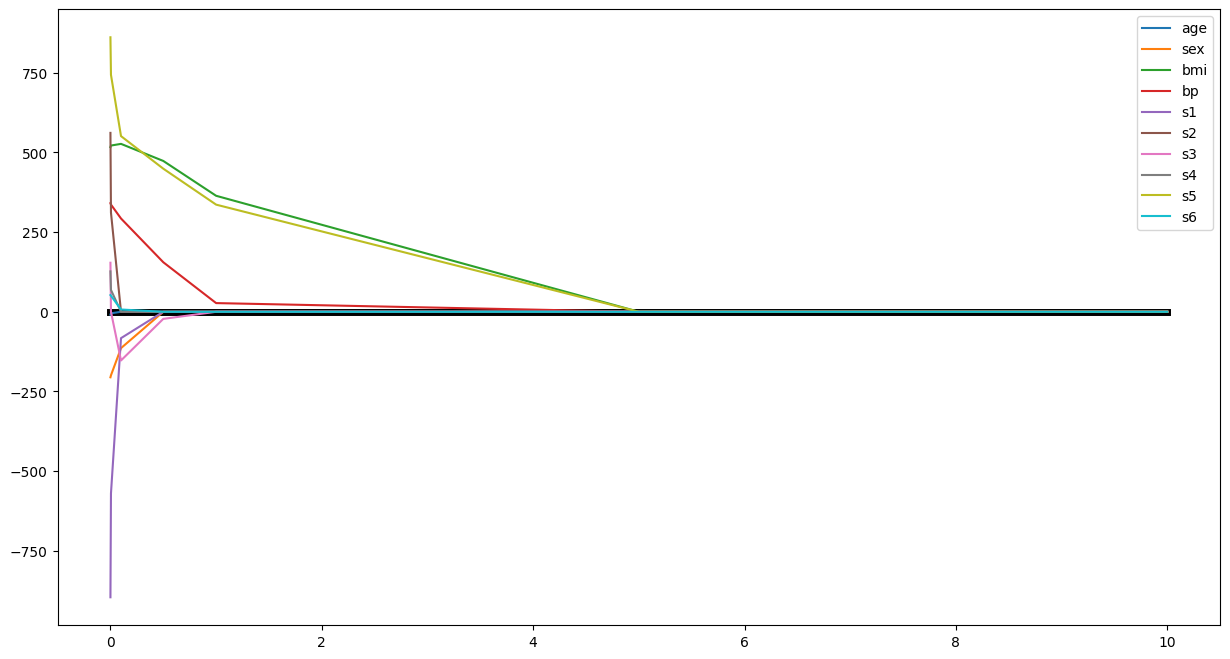

In [121]:
plt.figure(figsize=(15, 8))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)

for i in range(input_array.shape[0]):
    plt.plot(alphas, input_array[i], label = data.feature_names[i])

plt.legend()
plt.show()

### 3. Impact on Bias and Variance

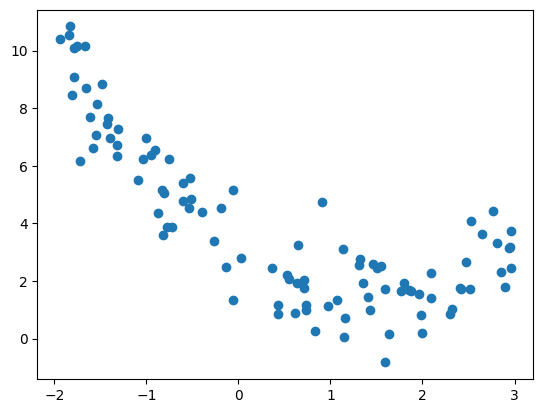

In [122]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [123]:
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp

X_train, X_test, y_train, y_test = train_test_split(X.reshape(100, 1), y.reshape(100), test_size=0.2, random_state=2)

poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

alphas = np.linspace(0.001, 30, 100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, 
        X_train, y_train, X_test, y_test, 
        loss='mse', 
        random_seed=123
    )
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

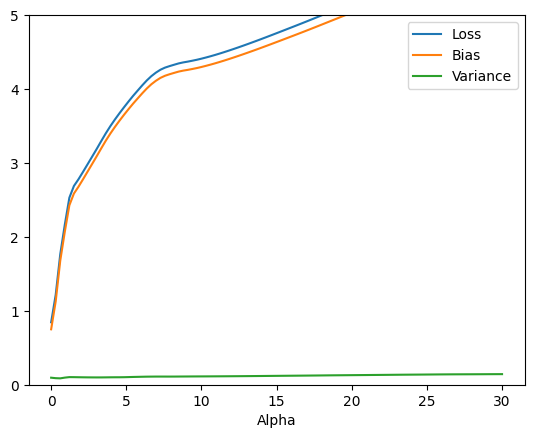

In [124]:
plt.plot(alphas, loss, label = 'Loss')
plt.plot(alphas, bias, label = 'Bias')
plt.plot(alphas, variance, label = 'Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()
plt.show()

### Effect of Regularization on Loss Function

[38.47185549]
-1.5451093359356598


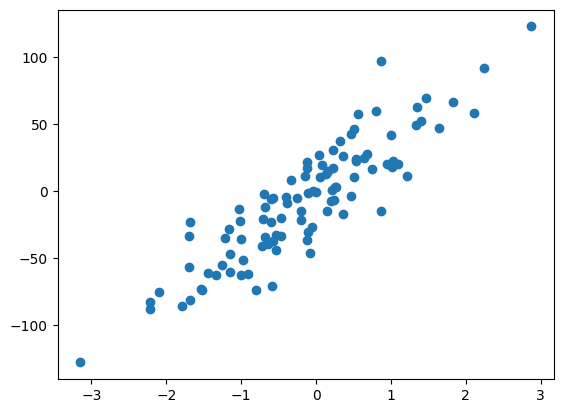

In [125]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=12)

plt.scatter(X, y)

reg = LinearRegression()
reg.fit(X, y)

print(reg.coef_)
print(reg.intercept_)

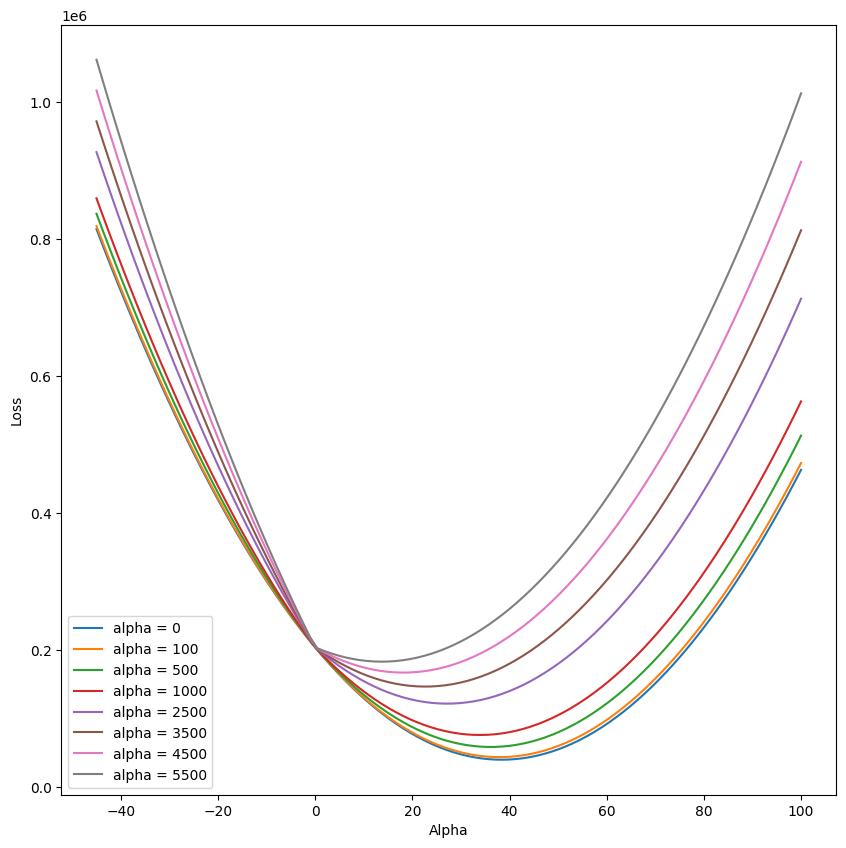

In [126]:
def cal_loss(m, alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

def predict(m):
    return m*X - 2.29

m = np.linspace(-45, 100, 100)
plt.figure(figsize=(10,10))

for j in  [0, 100, 500, 1000, 2500, 3500, 4500, 5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i], j)
        loss.append(loss_i)
    plt.plot(m, loss, label='alpha = {}'.format(j))

plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()